In [22]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet
from keras.datasets import mnist
from common.functions import softmax

In [23]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = mnist.load_data()

# 1次元へ整形
x_train, x_test = x_train.reshape(-1, 784), x_test.reshape(-1, 784)

# 正規化
x_train, x_test = x_train.astype(np.float32) / 255.0, x_test.astype(np.float32) / 255.0

In [24]:
x_base = x_train[0].copy()
x_base

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

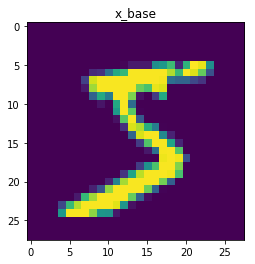

In [25]:
plt.imshow(x_base.reshape(28,28))
plt.title("x_base")
plt.show()

In [26]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# パラメータのロード
network.load_params("params_nn.pkl")
print("loaded Network Parameters!")

loaded Network Parameters!


In [27]:
pred = network.predict(x_base)
pred

array([-0.85297713, -3.66424245, -0.18508496,  9.85418412, -8.86099437,
       13.11292996, -6.54674727, -0.99105145, -2.4386287 ,  0.65709932])

In [28]:
pred_label = np.argmax(pred)
pred_label

5

In [29]:
pred_score = max(softmax(pred))
pred_score

0.9629792385831452

In [30]:
x = x_base.copy().reshape(1, 784)
grads = network.gradient(x, np.array([5]))
grads

{'W1': array([[ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -0.00000

In [31]:
np.set_printoptions(threshold=np.inf)
print(grads['W1'])

[[ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.0000

In [32]:
print(grads['W1'].shape)

(784, 50)


In [33]:
false_list = [[], [], [], [], [], [], [], [], [], []]
false_list

[[], [], [], [], [], [], [], [], [], []]

In [34]:
true_list = [[], [], [], [], [], [], [], [], [], []]
true_list

[[], [], [], [], [], [], [], [], [], []]

In [35]:
for i, t in enumerate(x_test):
    pre_l = np.argmax(network.predict(t))
    true_l = t_test[i]
    if pre_l == true_l:
        true_list[true_l].append(i)
    else:
        false_list[true_l].append(i)

In [36]:
len(true_list[5])

842

In [37]:
len(false_list[5])

50

In [38]:
def num_grads(nums, label):
    grads = []
    
    for x in nums:
        li = np.zeros(784)
        g = network.gradient(x.reshape(1, 784), np.array([label]))
#         li += np.sum(g['W1'], axis=1)
#         grads.append(li)
        grads.append(g['W1'].T)
        
    grads = np.array(grads)
        
    return grads
    

In [39]:
def check_miss(advs, label):
    fig = plt.figure(figsize=(15, 15))
    
    miss = 0
    
    for i, x in enumerate(advs):
        ax = fig.add_subplot(5, 5, i+1)
        ax.imshow(x.reshape(28,28), 'gray')
        pre = network.predict(x)
        pre_label = np.argmax(pre)
        pre_score = max(softmax(pre))
        ax.set_title(f"{pre_label} : {pre_score}")
        
        if not pre_label == label:
            miss += 1

    plt.show()
    
    return miss/len(advs)

In [40]:
true_x_list = []
for i in range(10):
    true_nums = true_list[i][:10]
    true_x_list.append(np.array(list(map(lambda x: x_test[x], true_nums))))
    
true_x_list = np.array(true_x_list)
true_x_list

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

In [41]:
def generate_advs(num_list):
    adv_list = []
    for i in range(10):
        print(i)

        x_batch = num_list[i]

        print("x_batch start")
        print(check_miss(x_batch, i))
        print("x_batch_end")
#         print(x_batch[0])

        x_grads = num_grads(x_batch, i)
    
        print("x_grads.shape", x_grads.shape)

        p = np.sign(x_grads)*0.07

#         print("p_start")
#         print(check_miss(p, i))
#         print(p[0])
#         print("p_end")

        for j, x in enumerate(x_batch):
            for k in range(x_grads.shape[0]):
                x += p[j, k]

        advs = x_batch.clip(min=0, max=1)

        print(check_miss(advs, i))

    #     print(advs[0])

        print("#############################")
        
        adv_list.append(advs)
        
    
    adv_list = np.array(adv_list)
    return adv_list

0
x_batch start


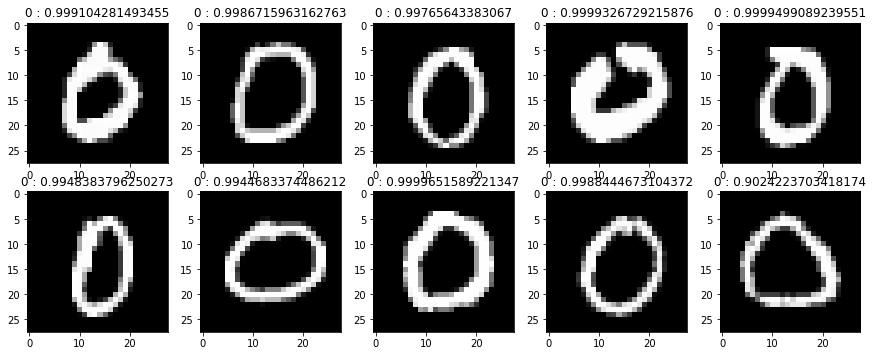

0.0
x_batch_end
x_grads.shape (10, 50, 784)


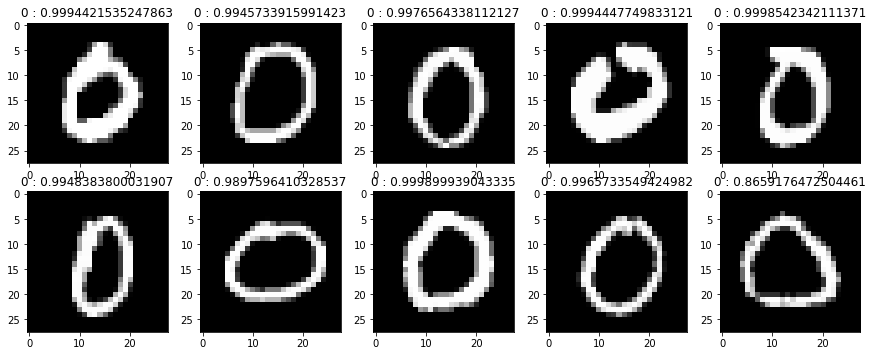

0.0
#############################
1
x_batch start


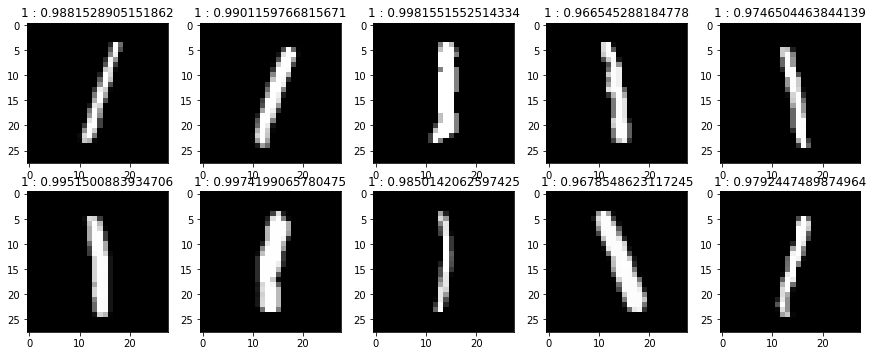

0.0
x_batch_end
x_grads.shape (10, 50, 784)


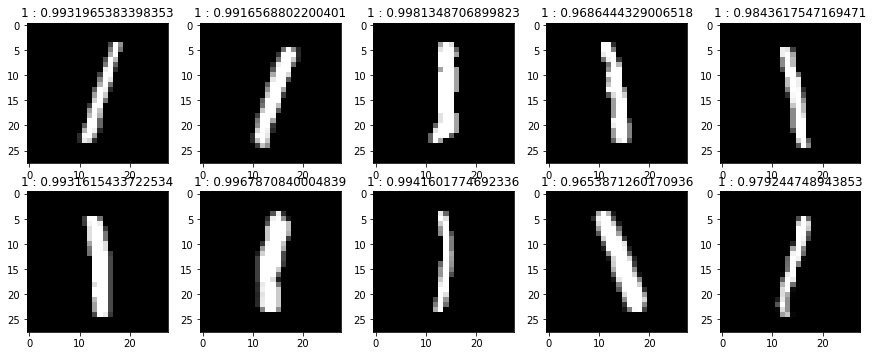

0.0
#############################
2
x_batch start


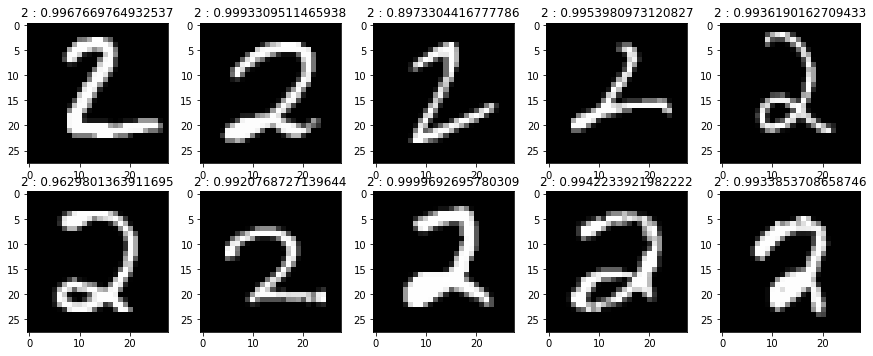

0.0
x_batch_end
x_grads.shape (10, 50, 784)


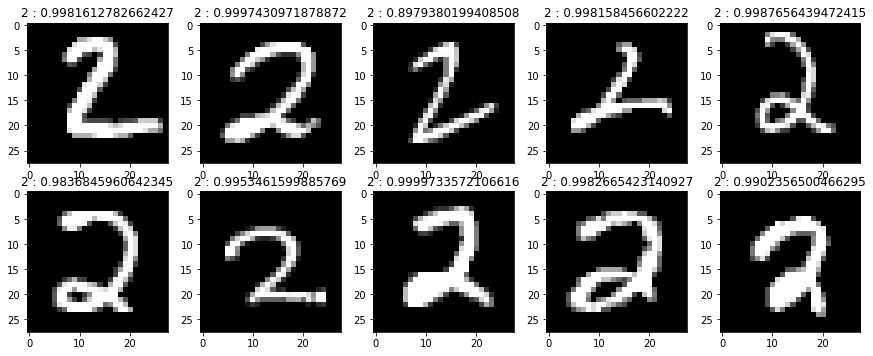

0.0
#############################
3
x_batch start


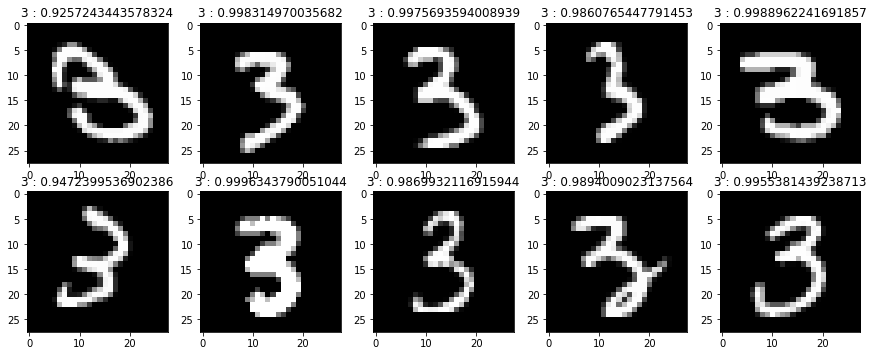

0.0
x_batch_end
x_grads.shape (10, 50, 784)


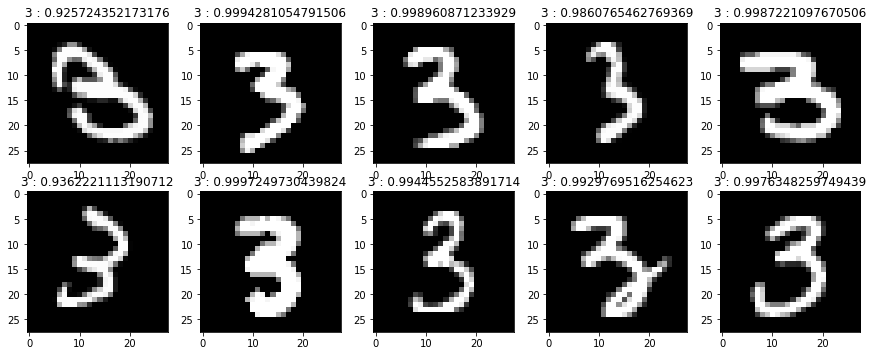

0.0
#############################
4
x_batch start


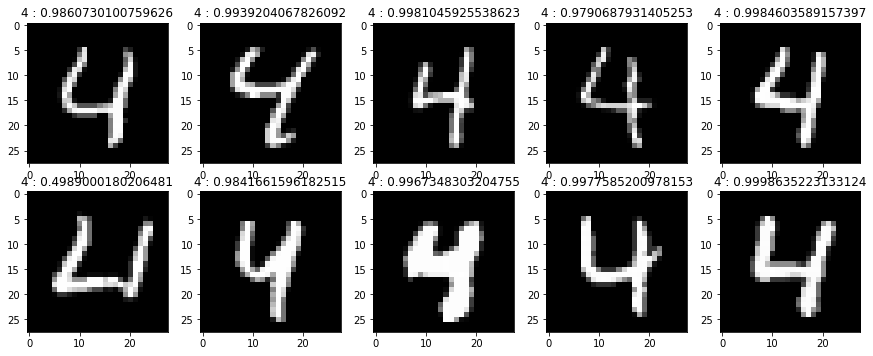

0.0
x_batch_end
x_grads.shape (10, 50, 784)


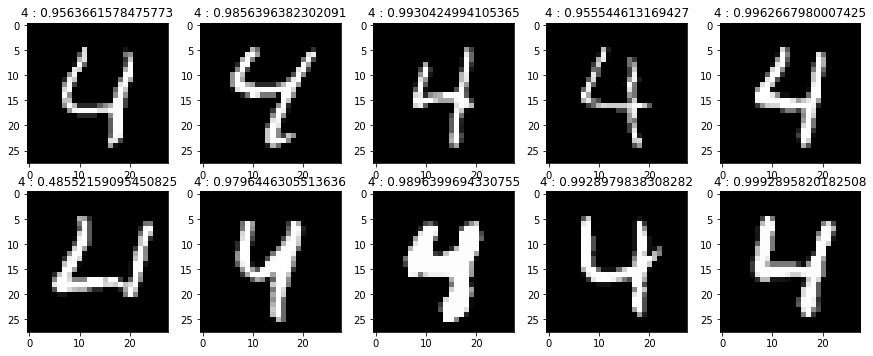

0.0
#############################
5
x_batch start


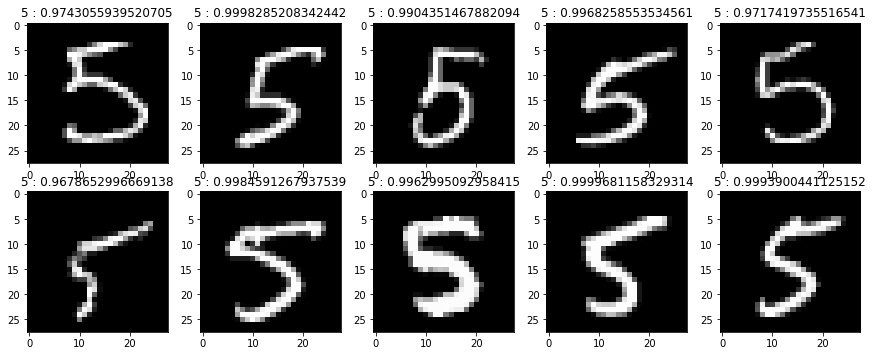

0.0
x_batch_end
x_grads.shape (10, 50, 784)


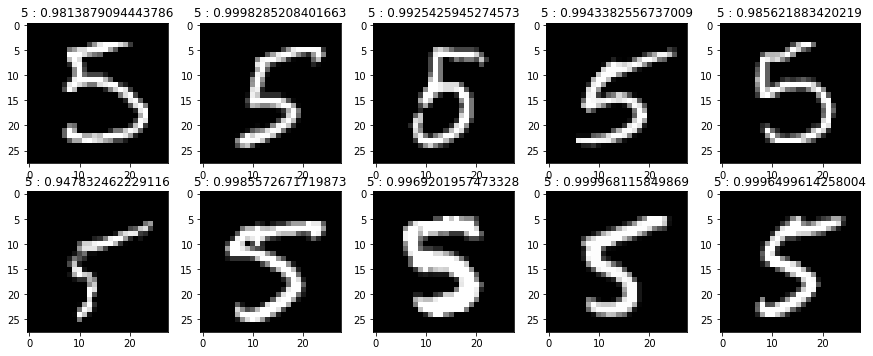

0.0
#############################
6
x_batch start


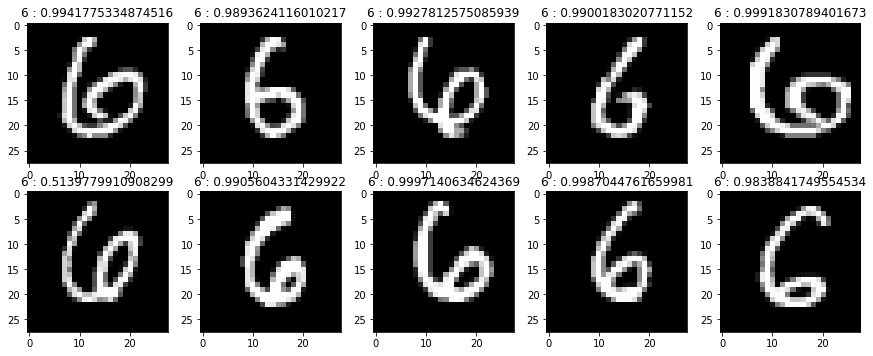

0.0
x_batch_end
x_grads.shape (10, 50, 784)


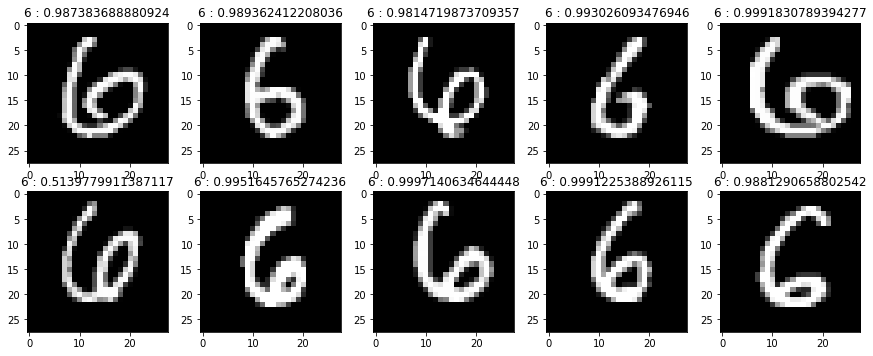

0.0
#############################
7
x_batch start


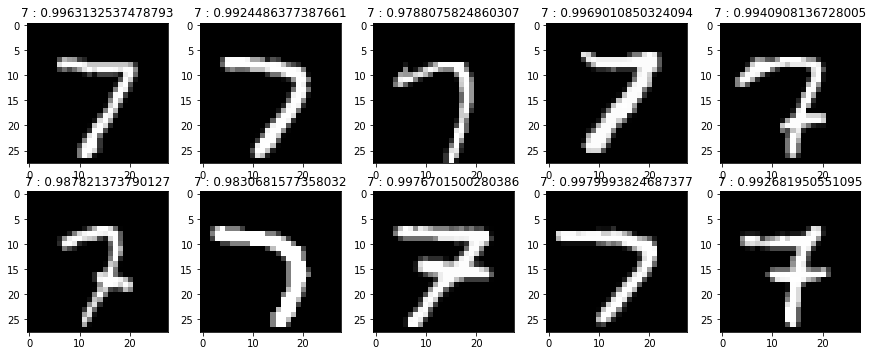

0.0
x_batch_end
x_grads.shape (10, 50, 784)


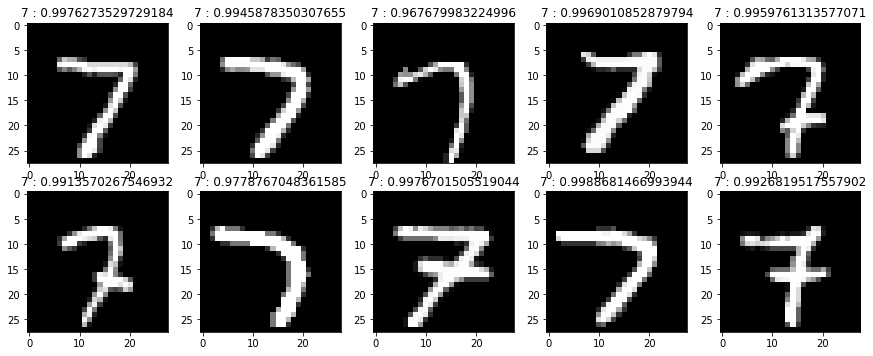

0.0
#############################
8
x_batch start


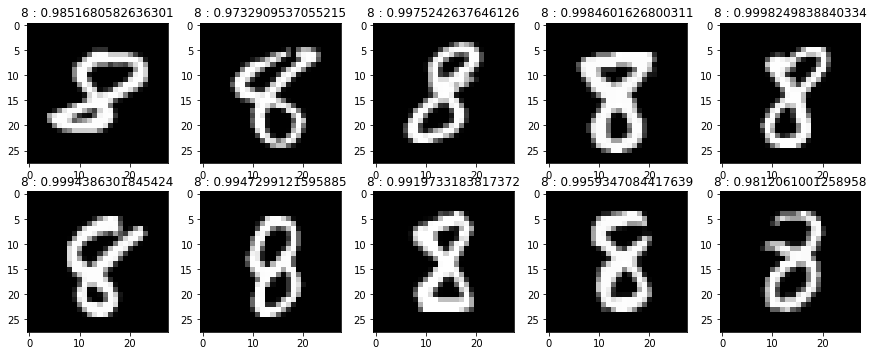

0.0
x_batch_end
x_grads.shape (10, 50, 784)


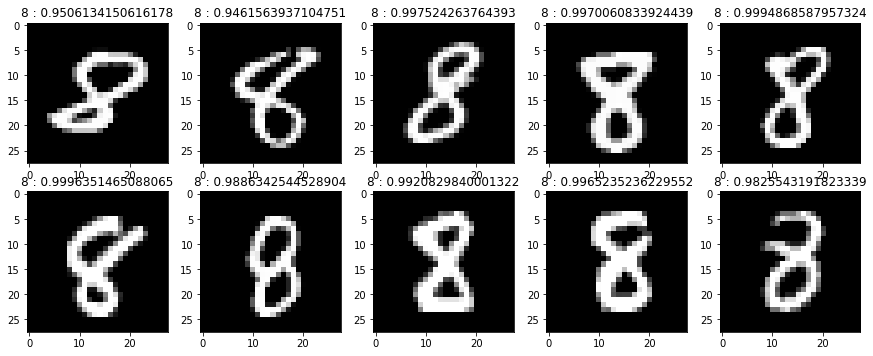

0.0
#############################
9
x_batch start


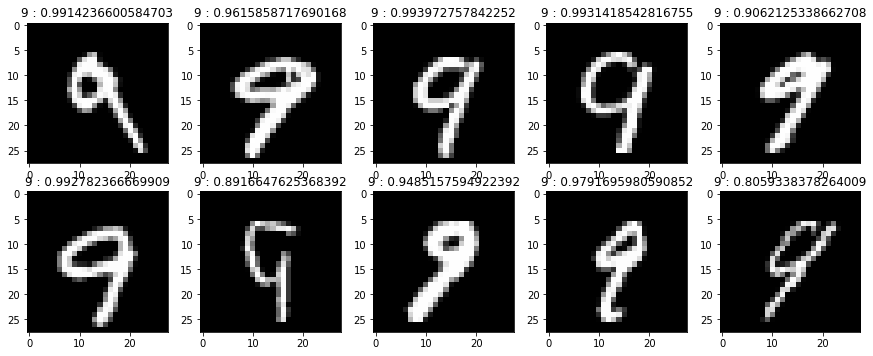

0.0
x_batch_end
x_grads.shape (10, 50, 784)


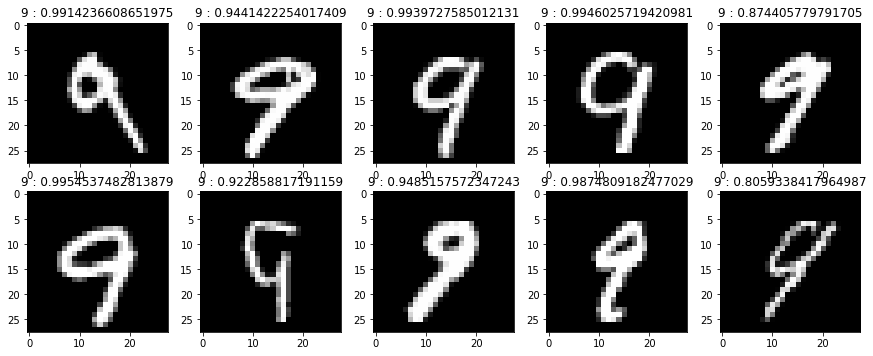

0.0
#############################


In [42]:
ad = generate_advs(true_x_list)

In [ ]:
# new_x = true_x_list
# for i in range(100):
#     new_x = generate_advs(new_x)
    
# for i in range(10):
#     print(check_miss(new_x[i], i))